# Radial basis function network (RBFN) homework.

In this homework you will implement from scratch your RBF-network using only numpy. This implementation will use gaussian kernel functions and the pseudo-inverse for linear regression.

## RBFN basic theory

Explain why is the pseudo-inverse used to linear regression in the RBFN network.

## RBFN implementation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class RBFN(object):

    def __init__(self, hidden_dimension, sigma=1.0):
        """ Radial basis function network (RBFN)
        # Arguments
            hidden_dimension: Integer indicating number of
                radial basis functions
            sigma: Float indicating the precision of the Gaussian.
        """
        self.hidden_dimension = hidden_dimension
        self.sigma = sigma
        self.centers = None
        self.weights = None

    def _kernel_function(self, center, data_point):
        """ Calculates the similarity/kernel function between
        the selected/constructed centers and the samples.
        # Arguments:
            center: numpy array of shape(, feature_dimension)
            data_points: numpy array of shape (, feature_dimension)
        # Returns:
            kernel_value: Float entry for the interpolation matrix.
        """
        kernel_value = np.exp(-(np.linalg.norm(data_point-center) ** 2 / self.sigma ** 2))
        return kernel_value

    def _calculate_interpolation_matrix(self, X):
        """ Calculates interpolation matrix using a kernel_function
        # Arguments
            X: numpy array of features
                with shape (num_samples, feature_dimension)
        # Returns
            G: Numpy array of the interpolation matrix with
                shape (num_samples, hidden_dimensions)
        """
        interpolation_matrix = np.zeros((X.shape[0], self.hidden_dimension), float)
        for ci, c in enumerate(self.centers):
            for xi, x in enumerate(X):
                interpolation_matrix[xi,ci] = self._kernel_function(c, x)
        return interpolation_matrix

    def _select_centers(self, X):
        """ Selects/creates centers from features.
        # Arguments:
            X: numpy array containing features of
                shape (num_samples, feature_dimension)
        # Returns:
            centers: numpy array containing feature centers
                of shape (hidden_dimension, feature_dimension)
        """
        random_rows = np.random.randint(X.shape[0], size=self.hidden_dimension)
        centers = X[random_rows,]
        return centers

    def fit(self, X, Y):
        """ Fits weights using linear regression
        # Arguments
            X: numpy array containing features of
                shape (num_samples, feature_dimension)
            Y: numpy array containing the targets
                of shape (num_samples, feature_dimension)
        """
        # select centers randomly from X
        self.centers = self._select_centers(X)
        #print("centers", self.centers)
        
        # calculate interpolation matrix 
        interpolation_matrix = self._calculate_interpolation_matrix(X)
        #print("interpolation matrix", interpolation_matrix)
        
        # train, adjust weights
        self.weights = np.dot(np.linalg.pinv(interpolation_matrix), Y)

    def predict(self, X):
        """
        # Arguments
            X: numpy array of features
                of shape (num_samples, feature_dimension)
        # Returns:
            predictions: numpy array of shape (num_samples, )
        """
        # calculate interpolation matrix 
        interpolation_matrix = self._calculate_interpolation_matrix(X)
        #print("interpolation matrix", interpolation_matrix)
        
        Y = np.dot(interpolation_matrix, self.weights)
        return Y

Now apply your RBF-network implementation to two interpolation problems in 1D and 2D.

## RBFN 1D interpolation example

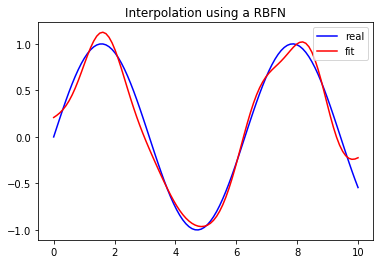

In [3]:
x = np.linspace(0, 10, 100)
y = np.sin(x)
model = RBFN(hidden_dimension=10, sigma=1.)
model.fit(x, y)
y_pred = model.predict(x)

plt.plot(x, y, 'b-', label='real')
plt.plot(x, y_pred, 'r-', label='fit')
plt.legend(loc='upper right')
plt.title('Interpolation using a RBFN')
plt.show()

Measure the error of the interpolation using mean squared error as you increase the hidden shape and as you vary the sigma

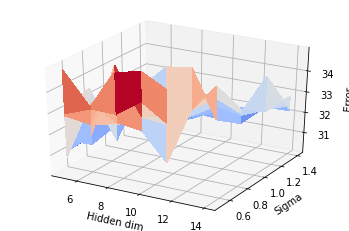

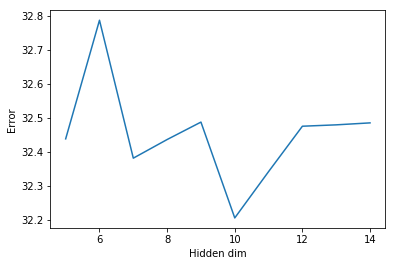

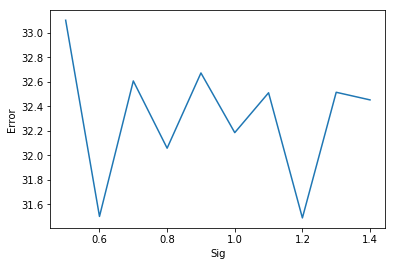

In [31]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

def tabulate(x, y, f):
    """Return a table of f(x, y)."""
    return np.vectorize(f)(*np.meshgrid(x, y, sparse=True))

def calc_error(hidden_dim, sig):
    #print(hidden_dim, sig)
    model = RBFN(hidden_dimension=hidden_dim, sigma=sig)
    model.fit(x, y)
    y_pred = model.predict(x)
    error = ((x - y_pred) ** 2).mean(axis=None)
    return error



X = np.arange(5, 15, 1)
Y = np.arange(0.5, 1.5, 0.1)
#X, Y = np.meshgrid(X, Y)

Z = tabulate(X, Y, calc_error)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#ax.plot_surface(hidden_dim, sig, error)
# print(X.shape)
# print(X)
# print(Y.shape)
# print(Y)
# print(Z.shape)
# print(Z)
ax.set_xlabel('Hidden dim')
ax.set_ylabel('Sigma')
ax.set_zlabel('Error')
ax.plot_surface(X, Y, Z,cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

fig = plt.figure()
x_data = []
y_data = []

for hid_dim in range(5,15,1):
    model = RBFN(hidden_dimension=hid_dim, sigma=1.0)
    model.fit(x, y)
    y_pred = model.predict(x)
    error = ((x - y_pred) ** 2).mean(axis=None)
    x_data.append(hid_dim)
    y_data.append(error)
        
plt.plot(x_data, y_data)
plt.xlabel("Hidden dim")
plt.ylabel("Error")
plt.show()



x_data = []
y_data = []

for sig in range(5,15, 1):
    sig = float(sig)
    sig = sig / 10
    model = RBFN(hidden_dimension=10, sigma=sig)
    model.fit(x, y)
    y_pred = model.predict(x)
    error = ((x - y_pred) ** 2).mean(axis=None)
    x_data.append(sig)
    y_data.append(error)
        
plt.plot(x_data, y_data)
plt.xlabel("Sig")
plt.ylabel("Error")
plt.show()
        
        
        #print("error for hidden_dimension=%s and sigma=%s: %s" % (hidden_dim, round(sig,1), error))

## RBFN 2D interpolation example

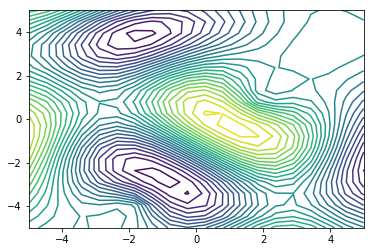

In [48]:
x = np.linspace(-5, 5, 20)
y = np.linspace(-5, 5, 20)
x, y = np.meshgrid(x, y)
z1 = np.sin(np.sqrt((x - 2.)**2 + (y - 1)**2))
z2 = np.sin(np.sqrt((x + 2.)**2 + (y + 4)**2))
z = (z1 - z2) / 2.
figure = plt.figure()
axis = plt.axes()
axis.contour(x, y, z, levels=25)
plt.show()

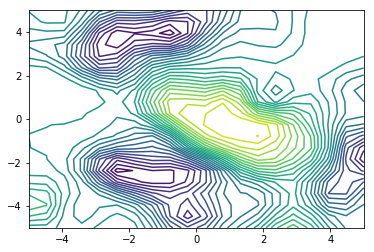

In [49]:
features = np.asarray(list(zip(x.flatten().tolist(), y.flatten().tolist())))
targets = z.flatten()
model = RBFN(hidden_dimension=70, sigma=1.)
model.fit(features, targets)
predictions = model.predict(features)
figure = plt.figure()
axis = plt.axes()
axis.contour(x, y, predictions.reshape(20, 20), levels=25)
plt.show()

Measure the error of the interpolation using mean squared error as you increase the hidden shape and as you vary the sigma

(5,)
(10,)
(10, 5)


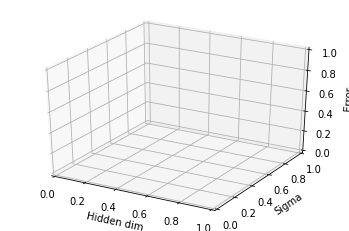

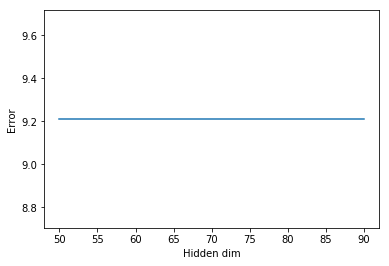

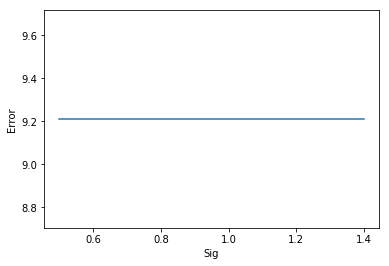

In [52]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

def tabulate(x, y, f):
    """Return a table of f(x, y)."""
    return np.vectorize(f)(*np.meshgrid(x, y, sparse=True))

def calc_error(hidden_dim, sig):
    #print(hidden_dim, sig)
    model = RBFN(hidden_dimension=hidden_dim, sigma=sig)
    model.fit(x, y)
    y_pred = model.predict(x)
    error = ((x - y_pred) ** 2).mean(axis=None)
    return error


X = np.arange(50, 100, 10)
Y = np.arange(0.5, 1.5, 0.1)
#X, Y = np.meshgrid(X, Y)

Z = tabulate(X, Y, calc_error)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('Hidden dim')
ax.set_ylabel('Sigma')
ax.set_zlabel('Error')
print(X.shape)
print(Y.shape)
print(Z.shape)
#ax.plot_surface(X, Y, Z,cmap=cm.coolwarm,
#                       linewidth=0, antialiased=False)

fig = plt.figure()
x_data = []
y_data = []

for hid_dim in range(50,100,10):
    model = RBFN(hidden_dimension=hid_dim, sigma=1.0)
    model.fit(x, y)
    y_pred = model.predict(x)
    error = ((x - y_pred) ** 2).mean(axis=None)
    x_data.append(hid_dim)
    y_data.append(error)
        
plt.plot(x_data, y_data)
plt.xlabel("Hidden dim")
plt.ylabel("Error")
plt.show()



x_data = []
y_data = []

for sig in range(5,15, 1):
    sig = float(sig)
    sig = sig / 10
    model = RBFN(hidden_dimension=70, sigma=sig)
    model.fit(x, y)
    y_pred = model.predict(x)
    error = ((x - y_pred) ** 2).mean(axis=None)
    x_data.append(sig)
    y_data.append(error)
        
plt.plot(x_data, y_data)
plt.xlabel("Sig")
plt.ylabel("Error")
plt.show()
        
        
        #print("error for hidden_dimension=%s and sigma=%s: %s" % (hidden_dim, round(sig,1), error))